# Black Scholes valuation methods

[*Black Scholes model WIKI*](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model). 


The purpose of this notebook is to review the most common algorithms and implement them numerically. 

## Contents
   - [European option](#sec1)
      - [Put-Call parity](#sec1.1)
   - [Numerical integration](#sec2)
   - [Monte Carlo method](#sec3)
   - [Binomial tree](#sec4)
   
Bachelier?

<a id='sec1'></a>
## European option

<a id='sec1.1'></a>
## Put-Call parity

<a id='sec2'></a>
## Numerical integration

<a id='sec3'></a>
## Monte Carlo method

<a id='sec4'></a>
## Binomial tree

In [81]:
from functions.BS_pricer import BS_pricer
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as ss
from scipy.integrate import quad

In [149]:
S0=100.0; K=100.0; T=1.0; r=0.1; sig=0.2;

e_ret = np.log(S0) + ( r - 0.5 * sig**2 ) * T
vol = sig * np.sqrt(T)

In [163]:
BS_pricer.BlackScholes("call",S0,K,T,r,sig)
BS_pricer.BlackScholes("put",S0,K,T,r,sig)

3.753418388256833

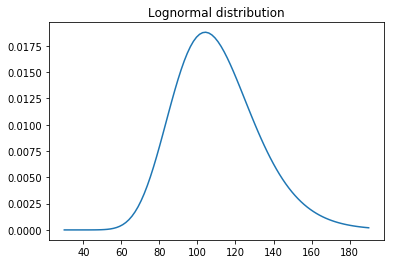

In [151]:
def log_normal(x,e_ret,vol):
    return 1/(x*vol*np.sqrt(2*np.pi)) * np.exp(- (np.log(x) - e_ret)**2 /(2*vol**2) )
x = np.linspace(30,190, 100)
plt.plot(x, log_normal(x, e_ret,vol))
plt.title("Lognormal distribution")
plt.show()

In [162]:
def integrand_LN(S, strike, e_ret, vol, payoff):
    if payoff == "call":
        return (S - strike ) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))
    elif payoff == "put":
        return (strike - S) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))

call = quad(integrand_LN, K, np.inf, args=(K, e_ret, vol, "call") )[0]  * np.exp(-r*T)
put = quad(integrand_LN, 0, K, args=(K, e_ret, vol, "put") )[0]  * np.exp(-r*T)

print("Call price: {} \nPut price: {} ".format(call,put) )

Call price: 13.269676584660926 
Put price: 3.753418388256828 
